### Table of Contents

* [Goals](#goals)
* [Data](#data)
* [Exploratory Data Analysis](#EDA)
    * [Data Information](#information)
    * [Data Cleaning](#cleaning)
    * [Data Exploration](#exploration)
* [Conclusion](#conclusion)

### Goals <a class="anchor" id="goals"></a>

This project consist in analyzing social and macroeconomic development in Brazil and correlate it to sustainability variables such as CO2 emission and deforestation. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="data"></a>

The data for this project was downloaded from the World Bank:

[https://databank.worldbank.org/source/world-development-indicators](https://databank.worldbank.org/source/world-development-indicators)


#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from wb_data_latam.csv and preview the first five rows of the DataFrame.

In [1]:
# sets up matplotlib with interactive features
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import re


In [2]:
latam_data = pd.read_csv('wb_data_latam.csv')

# see all columns
pd.set_option('display.max_columns', None)
latam_data.head()

,Country Name,Country Code,Series Name,Series Code,1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Latin America & Caribbean,LCN,Access to electricity (% of population),EG.ELC.ACCS.ZS,91.2475876868212,91.722504391963,92.3253443421342,92.6487349111193,92.7348197817314,93.2147201136005,93.5194994631709,94.2558942440304,94.4768226187752,95.2219493206794,95.4268422249441,95.874798098782,96.1850693362319,96.5713620953644,96.8678927010787,97.0593672921663,97.2889505262466,97.4818550592041,97.7135942305631,97.7603349993766,98.0015266427987,98.152759448219,98.2743453702088,98.5791344954591,..
1,Latin America & Caribbean,LCN,Adjusted net national income (constant 2015 US$),NY.ADJ.NNTY.KD,2764811152598.09,2848199780743.23,2854569749645.42,2867882277399.12,2900932743073.35,3023906704278.86,3105724601768.71,3344757716862.34,3557426917153.81,3658616185303.94,3584513865178.69,3825410100311.45,3981862112700.6,4032574003219.34,4172684244156.71,4223957688690.7,4267588721556.62,4240216249356.47,4386282005050.51,4400869578749.16,4448664733633.82,4147844352886.56,4317523517997.31,..,..
2,Latin America & Caribbean,LCN,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,5382.00038538551,5463.84573124709,5399.34375024185,5351.170115145,5342.64823347309,5499.03563011643,5578.41579995564,5936.48302241448,6241.40400812798,6347.50851469745,6151.15777456975,6496.14518008859,6686.47387820324,6697.07717184368,6855.72567300827,6867.70177121038,6867.80922281565,6755.5135428313,6920.66110710529,6880.37658795822,6894.01390544464,6376.07037169326,6591.85362173292,..,..
3,Latin America & Caribbean,LCN,Agricultural land (% of land area),AG.LND.AGRI.ZS,33.6754480992417,33.6488121520718,33.5230424316438,33.5588913279752,33.5650112727713,33.6370059320734,33.6975075209872,33.6835611884732,33.7405447523937,33.4748574590051,33.3401106377985,33.4118692784263,33.3361296398629,33.3446803104824,33.341665156281,33.1411976937325,33.1621251227375,33.031310625396,32.8524701732554,32.8032496721803,32.823563424755,32.9638639077502,32.9573955468781,..,..
4,Latin America & Caribbean,LCN,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,70.7027654762788,77.7204452710437,69.3084683311749,..,..


#### Explatory Data Analysis <a class="anchor" id="eda"></a>


#### Data Information <a class="anchor" id="information"></a>

Some immediate insights are:
* There are 29 columns and 1897 rows.
* The name and datatype of each column -- all values are set as object. We need to to change values from column 5 onward to float.
* It says all the columns have just 5 lines of missing data, but when investigating it using Data Wrangler its possible to see these empty lines should be deleted and there are many '..' values that should be set as Null.
* The column names could be renamed considering just the year (not [YRxxxx]) for simplicity.


In [3]:
# describe columns data
latam_data.describe()

,Country Name,Country Code,Series Name,Series Code,1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
count,1894,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892,1892
unique,45,43,44,44,1119,1211,1192,1203,1201,1206,1257,1234,1244,1240,1255,1265,1281,1285,1274,1299,1345,1264,1256,1245,1264,1182,1083,837,516
top,Latin America & Caribbean,LCN,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
freq,44,44,43,43,745,649,666,654,654,647,598,614,606,602,591,556,573,563,570,546,502,595,605,611,595,680,777,1017,1375


In [4]:
latam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   1894 non-null   object
 1   Country Code   1892 non-null   object
 2   Series Name    1892 non-null   object
 3   Series Code    1892 non-null   object
 4   1999 [YR1999]  1892 non-null   object
 5   2000 [YR2000]  1892 non-null   object
 6   2001 [YR2001]  1892 non-null   object
 7   2002 [YR2002]  1892 non-null   object
 8   2003 [YR2003]  1892 non-null   object
 9   2004 [YR2004]  1892 non-null   object
 10  2005 [YR2005]  1892 non-null   object
 11  2006 [YR2006]  1892 non-null   object
 12  2007 [YR2007]  1892 non-null   object
 13  2008 [YR2008]  1892 non-null   object
 14  2009 [YR2009]  1892 non-null   object
 15  2010 [YR2010]  1892 non-null   object
 16  2011 [YR2011]  1892 non-null   object
 17  2012 [YR2012]  1892 non-null   object
 18  2013 [YR2013]  1892 non-null

In [5]:
# replace '..' values with 'null'
latam_data = latam_data.replace('..', np.nan)

# change data type of column 5 onwards from object to float
for col in latam_data.columns[4:]:
    latam_data[col] = latam_data[col].astype(float)

latam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   1894 non-null   object 
 1   Country Code   1892 non-null   object 
 2   Series Name    1892 non-null   object 
 3   Series Code    1892 non-null   object 
 4   1999 [YR1999]  1147 non-null   float64
 5   2000 [YR2000]  1243 non-null   float64
 6   2001 [YR2001]  1226 non-null   float64
 7   2002 [YR2002]  1238 non-null   float64
 8   2003 [YR2003]  1238 non-null   float64
 9   2004 [YR2004]  1245 non-null   float64
 10  2005 [YR2005]  1294 non-null   float64
 11  2006 [YR2006]  1278 non-null   float64
 12  2007 [YR2007]  1286 non-null   float64
 13  2008 [YR2008]  1290 non-null   float64
 14  2009 [YR2009]  1301 non-null   float64
 15  2010 [YR2010]  1336 non-null   float64
 16  2011 [YR2011]  1319 non-null   float64
 17  2012 [YR2012]  1329 non-null   float64
 18  2013 [YR

In [6]:
# see what columns have missing data


In [7]:
# delete the 5 rows of the dataset
latam_data = latam_data.drop(latam_data.tail(5).index)

latam_data.isnull().sum()

Country Name        0
Country Code        0
Series Name         0
Series Code         0
1999 [YR1999]     745
2000 [YR2000]     649
2001 [YR2001]     666
2002 [YR2002]     654
2003 [YR2003]     654
2004 [YR2004]     647
2005 [YR2005]     598
2006 [YR2006]     614
2007 [YR2007]     606
2008 [YR2008]     602
2009 [YR2009]     591
2010 [YR2010]     556
2011 [YR2011]     573
2012 [YR2012]     563
2013 [YR2013]     570
2014 [YR2014]     546
2015 [YR2015]     502
2016 [YR2016]     595
2017 [YR2017]     605
2018 [YR2018]     611
2019 [YR2019]     595
2020 [YR2020]     680
2021 [YR2021]     777
2022 [YR2022]    1017
2023 [YR2023]    1375
dtype: int64

In [8]:
# rename column names from column 5 onwards
latam_data.columns = [col.split('[YR')[1].split(']')[0] if '[YR' in col else col for col in latam_data.columns]

latam_data.head()

,Country Name,Country Code,Series Name,Series Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Latin America & Caribbean,LCN,Access to electricity (% of population),EG.ELC.ACCS.ZS,9.124759e+01,9.172250e+01,9.232534e+01,9.264873e+01,9.273482e+01,9.321472e+01,9.351950e+01,9.425589e+01,9.447682e+01,9.522195e+01,9.542684e+01,9.587480e+01,9.618507e+01,9.657136e+01,9.686789e+01,9.705937e+01,9.728895e+01,9.748186e+01,9.771359e+01,9.776033e+01,9.800153e+01,9.815276e+01,9.827435e+01,98.579134,NaN
1,Latin America & Caribbean,LCN,Adjusted net national income (constant 2015 US$),NY.ADJ.NNTY.KD,2.764811e+12,2.848200e+12,2.854570e+12,2.867882e+12,2.900933e+12,3.023907e+12,3.105725e+12,3.344758e+12,3.557427e+12,3.658616e+12,3.584514e+12,3.825410e+12,3.981862e+12,4.032574e+12,4.172684e+12,4.223958e+12,4.267589e+12,4.240216e+12,4.386282e+12,4.400870e+12,4.448665e+12,4.147844e+12,4.317524e+12,NaN,NaN
2,Latin America & Caribbean,LCN,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,5.382000e+03,5.463846e+03,5.399344e+03,5.351170e+03,5.342648e+03,5.499036e+03,5.578416e+03,5.936483e+03,6.241404e+03,6.347509e+03,6.151158e+03,6.496145e+03,6.686474e+03,6.697077e+03,6.855726e+03,6.867702e+03,6.867809e+03,6.755514e+03,6.920661e+03,6.880377e+03,6.894014e+03,6.376070e+03,6.591854e+03,NaN,NaN
3,Latin America & Caribbean,LCN,Agricultural land (% of land area),AG.LND.AGRI.ZS,3.367545e+01,3.364881e+01,3.352304e+01,3.355889e+01,3.356501e+01,3.363701e+01,3.369751e+01,3.368356e+01,3.374054e+01,3.347486e+01,3.334011e+01,3.341187e+01,3.333613e+01,3.334468e+01,3.334167e+01,3.314120e+01,3.316213e+01,3.303131e+01,3.285247e+01,3.280325e+01,3.282356e+01,3.296386e+01,3.295740e+01,NaN,NaN
4,Latin America & Caribbean,LCN,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.070277e+01,7.772045e+01,6.930847e+01,NaN,NaN


#### Data Cleaning <a class="anchor" id="cleaning"></a>

* The dataset contains the data for all Latam countries but we just want to analyze Brazil. Let's filter it and keep just Brazil.
* The column "Series Code" don't tell us much, so let's take it off.
* The data is in the wide format (years in columns and variables in rows). Let's change it to the long format (variables in columns and years in rows), since it is more efficient considering the purpose of the project and the libraries we will be using.
* We don't need all 44 variables. Let's keep just those that might be interesting for our analysis.
* Finally, let's deal with the missing values. Since the variable we are looking at tend not to vary much and to make it simpler for this project, let's use the value from the previous period in the cases where we miss values.


In [9]:
# filter just Brazil
br_data = latam_data[latam_data['Country Name'] == 'Brazil']

# drop the 'Series Code' column
br_data = br_data.drop('Series Code', axis=1)

br_data.head()

,Country Name,Country Code,Series Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
352,Brazil,BRA,Access to electricity (% of population),9.476296e+01,9.440000e+01,9.600000e+01,9.670000e+01,9.700000e+01,9.680000e+01,9.710000e+01,9.760000e+01,9.810000e+01,9.850000e+01,9.890000e+01,9.860000e+01,9.930000e+01,9.950000e+01,9.960000e+01,9.970000e+01,9.970000e+01,9.970000e+01,9.980000e+01,9.970000e+01,9.980000e+01,9.970000e+01,9.950000e+01,100.000000,NaN
353,Brazil,BRA,Adjusted net national income (constant 2015 US$),9.306510e+11,9.653745e+11,9.668836e+11,9.914623e+11,1.000147e+12,1.070950e+12,1.092439e+12,1.153751e+12,1.233167e+12,1.279115e+12,1.268515e+12,1.349874e+12,1.391691e+12,1.375519e+12,1.435186e+12,1.423738e+12,1.344520e+12,1.294683e+12,1.345642e+12,1.358081e+12,1.375689e+12,1.339284e+12,1.357503e+12,NaN,NaN
354,Brazil,BRA,Adjusted net national income per capita (const...,5.364407e+03,5.489021e+03,5.425472e+03,5.493576e+03,5.476381e+03,5.797628e+03,5.848259e+03,6.110301e+03,6.463837e+03,6.638809e+03,6.521338e+03,6.874715e+03,7.022170e+03,6.878361e+03,7.114682e+03,6.997645e+03,6.552617e+03,6.258753e+03,6.453767e+03,6.461926e+03,6.495750e+03,6.281929e+03,6.333815e+03,NaN,NaN
355,Brazil,BRA,Agricultural land (% of land area),2.730509e+01,2.731750e+01,2.732991e+01,2.734232e+01,2.735472e+01,2.736713e+01,2.737954e+01,2.739258e+01,2.747882e+01,2.756506e+01,2.765130e+01,2.773753e+01,2.782377e+01,2.791001e+01,2.799625e+01,2.808249e+01,2.816873e+01,2.825497e+01,2.834107e+01,2.841563e+01,2.849013e+01,2.856462e+01,2.863909e+01,NaN,NaN
356,Brazil,BRA,"Central government debt, total (% of GDP)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.131878e+01,5.934166e+01,5.984949e+01,5.722841e+01,5.845727e+01,6.753755e+01,7.341880e+01,8.366920e+01,8.660788e+01,9.256525e+01,9.870988e+01,8.501150e+01,79.102322,NaN


In [10]:
# Transforming from wide to long
br_data_long = pd.melt(br_data, id_vars=['Country Name', 'Country Code', 'Series Name'], var_name='Year', value_name='Value')

# Ordering by Series Name and Year
br_data_long = br_data_long.sort_values(['Series Name', 'Year'])

br_data_long.head()

,Country Name,Country Code,Series Name,Year,Value
0,Brazil,BRA,Access to electricity (% of population),1999,94.76296
44,Brazil,BRA,Access to electricity (% of population),2000,94.40000
88,Brazil,BRA,Access to electricity (% of population),2001,96.00000
132,Brazil,BRA,Access to electricity (% of population),2002,96.70000
176,Brazil,BRA,Access to electricity (% of population),2003,97.00000


In [11]:
# Filtering the DataFrame to keep only the relevant variables
variables_to_keep = [
    'Agricultural land (% of land area)',
    'CO2 emissions (metric tons per capita)',
    'Current health expenditure (% of GDP)',
    'Forest area (% of land area)',
    'GDP (constant 2015 US$)',
    'GDP per capita (constant 2015 US$)',
    'Gini index',
    'Gross capital formation (% of GDP)',
    'Individuals using the Internet (% of population)',
    'Intentional homicides (per 100,000 people)',
    'Life expectancy at birth, total (years)',
    'Population, total',
    'Renewable electricity output (% of total electricity output)',
    'Rural population (% of total population)',
    'Unemployment, total (% of total labor force) (national estimate)'
]

br_data_long = br_data_long[br_data_long['Series Name'].isin(variables_to_keep)]

br_data_long.head()

,Country Name,Country Code,Series Name,Year,Value
3,Brazil,BRA,Agricultural land (% of land area),1999,27.305094
47,Brazil,BRA,Agricultural land (% of land area),2000,27.317501
91,Brazil,BRA,Agricultural land (% of land area),2001,27.329908
135,Brazil,BRA,Agricultural land (% of land area),2002,27.342315
179,Brazil,BRA,Agricultural land (% of land area),2003,27.354722


In [12]:
# Pivot the DataFrame to have each unique variable within Series Name set as one column with its own values
br_data_pivoted = br_data_long.pivot(index=['Country Name', 'Country Code', 'Year'], columns='Series Name', values='Value').reset_index()

br_data_pivoted.head(50)

Series Name,Country Name,Country Code,Year,Agricultural land (% of land area),CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),Forest area (% of land area),GDP (constant 2015 US$),GDP per capita (constant 2015 US$),Gini index,Gross capital formation (% of GDP),Individuals using the Internet (% of population),"Intentional homicides (per 100,000 people)","Life expectancy at birth, total (years)","Population, total",Renewable electricity output (% of total electricity output),Rural population (% of total population),"Unemployment, total (% of total labor force) (national estimate)"
0,Brazil,BRA,1999,27.305094,1.734769,NaN,66.386725,1.136548e+12,6551.226671,59.0,17.389560,2.038732,24.736250,69.524,173486281.0,90.036927,19.504,11.125
1,Brazil,BRA,2000,27.317501,1.783500,8.334572,65.934359,1.186419e+12,6745.857771,NaN,18.903119,2.870685,25.799761,69.737,175873720.0,89.492706,18.808,NaN
2,Brazil,BRA,2001,27.329908,1.792112,8.549633,65.461671,1.202909e+12,6749.881603,58.4,18.741860,4.528495,26.908980,70.195,178211881.0,84.287445,18.447,10.649
3,Brazil,BRA,2002,27.342315,1.760651,8.696870,64.988983,1.239639e+12,6868.695907,58.1,17.449079,9.149425,27.543724,70.410,180476685.0,85.738173,18.120,10.641
4,Brazil,BRA,2003,27.354722,1.701853,8.188994,64.516295,1.253782e+12,6865.173250,57.6,16.856688,13.207586,27.960468,70.720,182629278.0,87.163603,17.797,11.169
5,Brazil,BRA,2004,27.367130,1.778441,8.124920,64.043608,1.325999e+12,7178.347485,56.5,17.912568,19.073672,26.198281,71.131,184722043.0,86.032112,17.479,10.072
6,Brazil,BRA,2005,27.379537,1.775663,8.035396,63.570920,1.368459e+12,7325.903550,56.3,17.204883,21.022747,25.478415,71.753,186797334.0,87.124628,17.166,10.551
7,Brazil,BRA,2006,27.392578,1.777478,8.249525,63.098232,1.422677e+12,7534.542500,55.6,17.816474,28.178380,26.037932,72.037,188820682.0,86.747652,16.857,9.692
8,Brazil,BRA,2007,27.478817,1.847976,8.201830,62.625545,1.509032e+12,7909.825247,54.9,19.819326,30.880000,25.018942,72.365,190779453.0,88.214680,16.552,9.280
9,Brazil,BRA,2008,27.565056,1.939215,8.011285,62.152857,1.585905e+12,8231.100373,54.0,21.619383,33.830000,26.020863,72.715,192672317.0,84.266424,16.251,8.268


In [13]:
# Fill missing values with the value from the previous row
br_data_pivoted = br_data_pivoted.set_index(['Country Name', 'Country Code', 'Year']).sort_index()
br_data_pivoted = br_data_pivoted.fillna(method='ffill')

# Fill missing values from the year 1999 with the value from the first row after the missing values
br_data_pivoted = br_data_pivoted.fillna(method='bfill')

# Reset the index to get back to the original format
br_data_pivoted = br_data_pivoted.reset_index()

br_data_pivoted.head(50)

/var/folders/7z/t0nvsc6s1810pdgw0lygqrjc0000gn/T/ipykernel_7571/1621388128.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  br_data_pivoted = br_data_pivoted.fillna(method='ffill')
/var/folders/7z/t0nvsc6s1810pdgw0lygqrjc0000gn/T/ipykernel_7571/1621388128.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  br_data_pivoted = br_data_pivoted.fillna(method='bfill')


Series Name,Country Name,Country Code,Year,Agricultural land (% of land area),CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),Forest area (% of land area),GDP (constant 2015 US$),GDP per capita (constant 2015 US$),Gini index,Gross capital formation (% of GDP),Individuals using the Internet (% of population),"Intentional homicides (per 100,000 people)","Life expectancy at birth, total (years)","Population, total",Renewable electricity output (% of total electricity output),Rural population (% of total population),"Unemployment, total (% of total labor force) (national estimate)"
0,Brazil,BRA,1999,27.305094,1.734769,8.334572,66.386725,1.136548e+12,6551.226671,59.0,17.389560,2.038732,24.736250,69.524,173486281.0,90.036927,19.504,11.125
1,Brazil,BRA,2000,27.317501,1.783500,8.334572,65.934359,1.186419e+12,6745.857771,59.0,18.903119,2.870685,25.799761,69.737,175873720.0,89.492706,18.808,11.125
2,Brazil,BRA,2001,27.329908,1.792112,8.549633,65.461671,1.202909e+12,6749.881603,58.4,18.741860,4.528495,26.908980,70.195,178211881.0,84.287445,18.447,10.649
3,Brazil,BRA,2002,27.342315,1.760651,8.696870,64.988983,1.239639e+12,6868.695907,58.1,17.449079,9.149425,27.543724,70.410,180476685.0,85.738173,18.120,10.641
4,Brazil,BRA,2003,27.354722,1.701853,8.188994,64.516295,1.253782e+12,6865.173250,57.6,16.856688,13.207586,27.960468,70.720,182629278.0,87.163603,17.797,11.169
5,Brazil,BRA,2004,27.367130,1.778441,8.124920,64.043608,1.325999e+12,7178.347485,56.5,17.912568,19.073672,26.198281,71.131,184722043.0,86.032112,17.479,10.072
6,Brazil,BRA,2005,27.379537,1.775663,8.035396,63.570920,1.368459e+12,7325.903550,56.3,17.204883,21.022747,25.478415,71.753,186797334.0,87.124628,17.166,10.551
7,Brazil,BRA,2006,27.392578,1.777478,8.249525,63.098232,1.422677e+12,7534.542500,55.6,17.816474,28.178380,26.037932,72.037,188820682.0,86.747652,16.857,9.692
8,Brazil,BRA,2007,27.478817,1.847976,8.201830,62.625545,1.509032e+12,7909.825247,54.9,19.819326,30.880000,25.018942,72.365,190779453.0,88.214680,16.552,9.280
9,Brazil,BRA,2008,27.565056,1.939215,8.011285,62.152857,1.585905e+12,8231.100373,54.0,21.619383,33.830000,26.020863,72.715,192672317.0,84.266424,16.251,8.268


It's ok not to have the data for the last 2Y since we would be just copying it from the previous one and keep with the same value.

* Let's now make each unique variable within Series Name as one column with its own values.

In [14]:
# perform summary statistics
br_data_pivoted.describe()

Series Name,Agricultural land (% of land area),CO2 emissions (metric tons per capita),Current health expenditure (% of GDP),Forest area (% of land area),GDP (constant 2015 US$),GDP per capita (constant 2015 US$),Gini index,Gross capital formation (% of GDP),Individuals using the Internet (% of population),"Intentional homicides (per 100,000 people)","Life expectancy at birth, total (years)","Population, total",Renewable electricity output (% of total electricity output),Rural population (% of total population),"Unemployment, total (% of total labor force) (national estimate)"
count,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,25.000000
mean,27.887458,1.984996,8.697940,61.813675,1.608357e+12,8107.094094,54.38400,18.289063,43.943892,26.096081,72.779720,1.972178e+08,81.114684,15.484000,10.051000
std,0.497855,0.228507,0.764239,2.310589,2.628681e+11,867.188286,2.57013,2.281655,26.700789,2.504099,1.699328,1.331392e+07,6.541926,2.156006,1.956329
min,27.305094,1.701853,7.736377,59.270527,1.136548e+12,6551.226671,48.90000,14.625588,2.038732,20.810464,69.524000,1.734863e+08,73.082074,12.212000,6.755000
25%,27.379537,1.783500,8.124920,59.832881,1.368459e+12,7325.903550,52.90000,16.856688,21.022747,25.018942,71.753000,1.867973e+08,73.966908,13.691000,8.538000
50%,27.823774,1.942523,8.394805,61.023328,1.743173e+12,8426.843221,53.70000,17.912568,45.690000,26.355638,73.182000,1.981853e+08,84.266424,15.369000,10.072000
75%,28.341066,2.110628,9.464750,63.570920,1.804862e+12,8783.215424,56.30000,19.819326,67.471285,27.960468,74.009000,2.085050e+08,87.120997,17.166000,11.169000
max,28.639094,2.514592,10.182350,66.386725,1.954752e+12,9216.132280,59.00000,21.826271,81.342694,30.593037,75.338000,2.164224e+08,90.036927,19.504000,13.697000


#### Data Exploration <a class="anchor" id="exploration"></a>

* Now let's start exploring the date and search for insights with a focus on deforestation and CO2 emission.
    - 1. Evolution of % Forest Area and CO2 Emissions along the years: There is a clear process of deforestation ocurring in Brazil. The forest area as percentage of land area has reduced from 66.4% in 1999 to 59.7% in 2023. It happened together with an increase in CO2 emissions, which peaked in 2014 and eased in more recent periods and an increase of agricultural area (from 27.31% in 1999 to 28.64% in 2023, or 0.055% per year on average).
    - 2. Correlation between % Forest Area vs % Rural Population: There is a strong correlation between deforestation and urbanization.
    - 3. Correlation between % Forest Area vs % Agricultural Land: There is a strong correlation between deforestation and an increase in agricultural land.
    - 4. Correlation berween CO2 Emissions vs GDP: There is a moderate correlation between increased CO2 emissions and GDP growth.
    - 5. Linear Regression between % Forest Area (dependent variable) vs % Agricultural Area (independent variable): Significant negative relationship between the variables, with a good degree of explanatory power (R2 = 76% confidence).
    - 6. Forecast of % Forest Area if % Agricultural Area continues to increase by 0.055% per year: Considering the actual trend of increase in Agricultural Area as percentage of land area consinues, Brazil will reach the mark of less than 50% of Forest Area as percentage of land area by 2060.

* #### 1. Evolution of % Forest Area and CO2 Emissions along the years

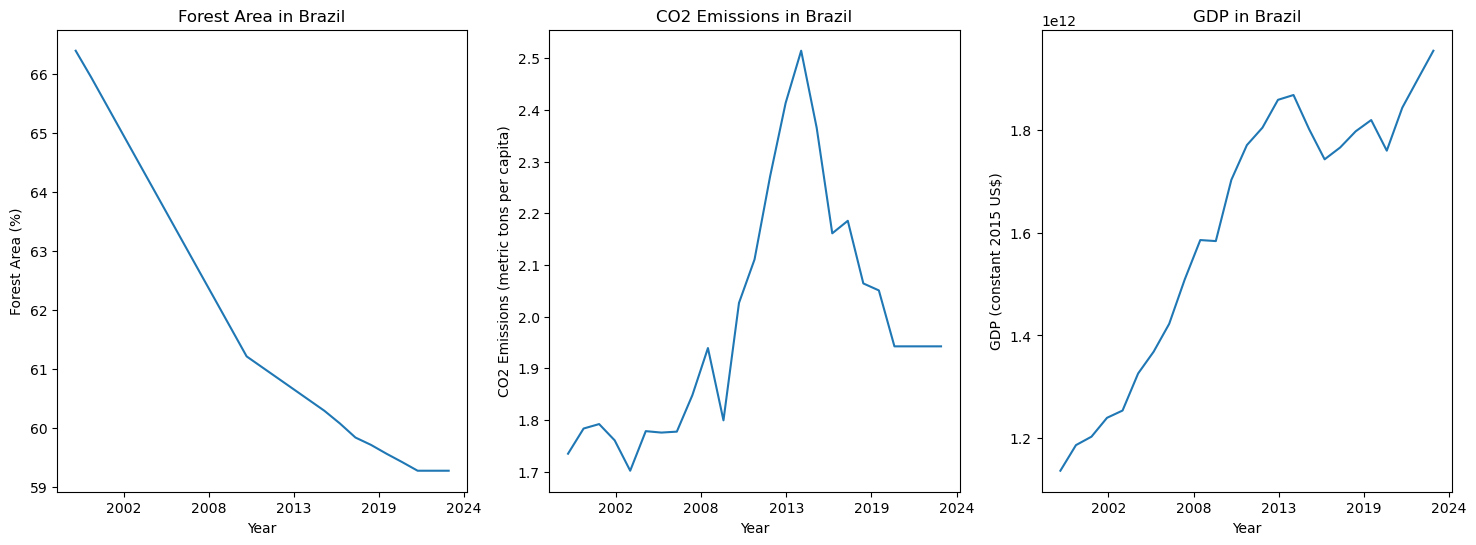

In [15]:
# Plot Forest area %, CO2 emissions, and GDP along the years side by side

# Create a figure and three axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Set the x-axis to Year for all plots
x = mdates.datestr2num(br_data_pivoted['Year'])

# Plot Forest area % on the first axis
ax1.plot(x, br_data_pivoted['Forest area (% of land area)'], label='Forest area (%)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Forest Area (%)')
ax1.set_title('Forest Area in Brazil')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot CO2 emissions on the second axis
ax2.plot(x, br_data_pivoted['CO2 emissions (metric tons per capita)'], label='CO2 emissions')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Emissions (metric tons per capita)')
ax2.set_title('CO2 Emissions in Brazil')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot GDP on the third axis
ax3.plot(x, br_data_pivoted['GDP (constant 2015 US$)'], label='GDP')
ax3.set_xlabel('Year')
ax3.set_ylabel('GDP (constant 2015 US$)')
ax3.set_title('GDP in Brazil')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

# Display the plot
plt.show()

* #### 2. Correlation between % Forest Area vs % Rural Population

Correlation between Forest area and Rural population: 0.980161458932757


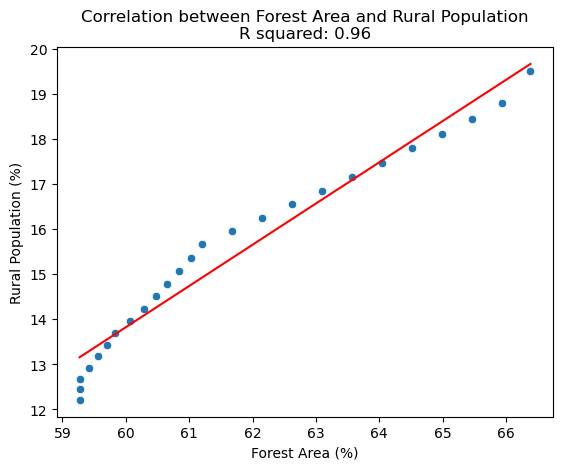

In [16]:
# Correlation between Forest area and Rural population
forest_area_rural_pop = br_data_pivoted['Forest area (% of land area)'].corr(br_data_pivoted['Rural population (% of total population)'])
print("Correlation between Forest area and Rural population:", forest_area_rural_pop)

# Calculate the trend line
x = br_data_pivoted['Forest area (% of land area)']
y = br_data_pivoted['Rural population (% of total population)']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Calculate the R squared
r_squared = model.rsquared

# Plot the scatter plot with the trend line and R squared
sns.scatterplot(x='Forest area (% of land area)', y='Rural population (% of total population)', data=br_data_pivoted)
plt.plot(x['Forest area (% of land area)'], predictions, color='red')
plt.title(f"Correlation between Forest Area and Rural Population\nR squared: {r_squared:.2f}")
plt.xlabel("Forest Area (%)")
plt.ylabel("Rural Population (%)")
plt.show()

* #### 3. Correlation between % Forest Area vs % Agricultural Area

Correlation between Forest area and Agricultural area: -0.9192949778906869


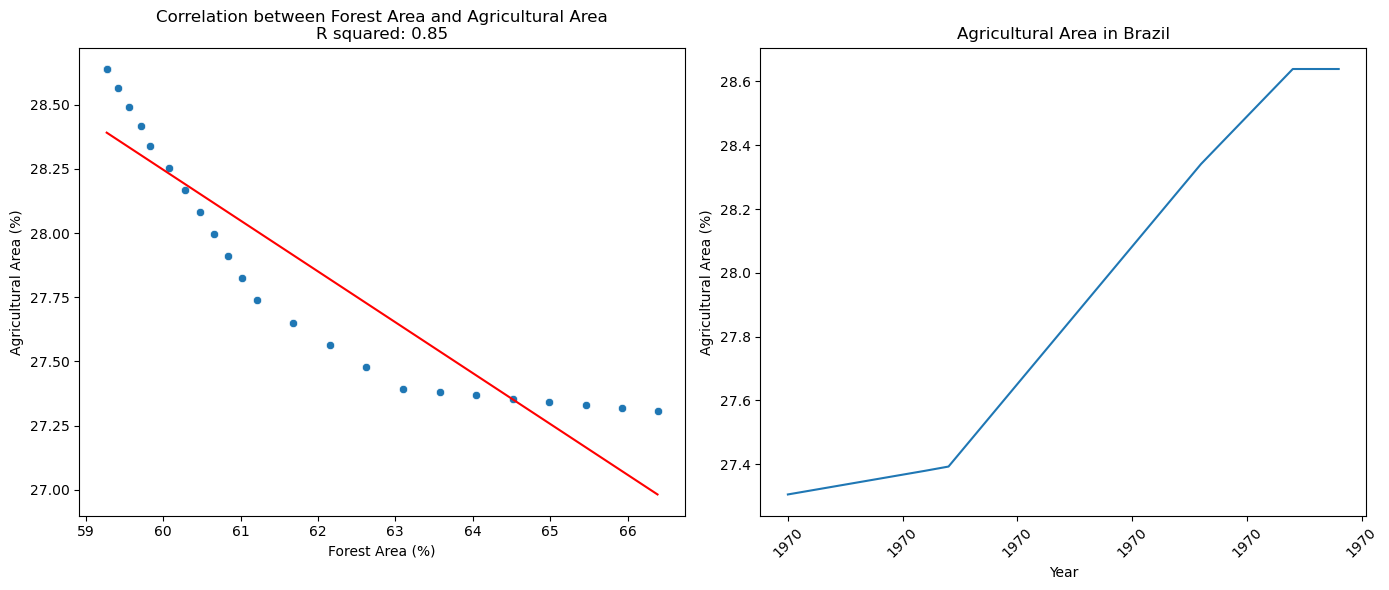

In [17]:
# Calculate the correlation between Forest area and Agricultural area
forest_area_agri_area = br_data_pivoted['Forest area (% of land area)'].corr(br_data_pivoted['Agricultural land (% of land area)'])
print("Correlation between Forest area and Agricultural area:", forest_area_agri_area)

# Calculate the trend line
x = br_data_pivoted['Forest area (% of land area)']
y = br_data_pivoted['Agricultural land (% of land area)']
x_const = sm.add_constant(x)
model = sm.OLS(y, x_const).fit()
predictions = model.predict(x_const)

# Calculate the R squared
r_squared = model.rsquared

# Set up the figure for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Correlation Chart
sns.scatterplot(x='Forest area (% of land area)', y='Agricultural land (% of land area)', data=br_data_pivoted, ax=axs[0])
axs[0].plot(x, predictions, color='red')
axs[0].set_title(f"Correlation between Forest Area and Agricultural Area\nR squared: {r_squared:.2f}")
axs[0].set_xlabel("Forest Area (%)")
axs[0].set_ylabel("Agricultural Area (%)")

# Subplot 2: Agricultural Area Line Chart
axs[1].plot(br_data_pivoted.index, br_data_pivoted['Agricultural land (% of land area)'], label='Agricultural Area (%)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Agricultural Area (%)')
axs[1].set_title('Agricultural Area in Brazil')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


* #### 4. Correlation between CO2 Emissions vs GDP Growth

Correlation between CO2 emissions and GDP: 0.742921411651695


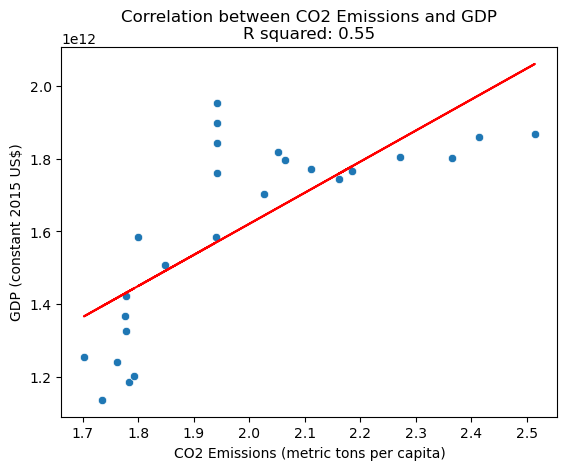

In [18]:
# Correlation between CO2 emissions and GDP
co2_emissions_gdp = br_data_pivoted['CO2 emissions (metric tons per capita)'].corr(br_data_pivoted['GDP (constant 2015 US$)'])
print("Correlation between CO2 emissions and GDP:", co2_emissions_gdp)

# Calculate the trend line
x = br_data_pivoted['CO2 emissions (metric tons per capita)']
y = br_data_pivoted['GDP (constant 2015 US$)']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

# Calculate the R squared
r_squared = model.rsquared

# Plot the scatter plot with the trend line and R squared
sns.scatterplot(x='CO2 emissions (metric tons per capita)', y='GDP (constant 2015 US$)', data=br_data_pivoted)
plt.plot(x['CO2 emissions (metric tons per capita)'], predictions, color='red')
plt.title(f"Correlation between CO2 Emissions and GDP\nR squared: {r_squared:.2f}")
plt.xlabel("CO2 Emissions (metric tons per capita)")
plt.ylabel("GDP (constant 2015 US$)")
plt.show()



* #### 5. Linear Regression between % Forest Area (dependent variable) vs % Agricultural Area (independent variable)

forest_area          0
agricultural_land    0
dtype: int64
Mean Squared Error: 1.4727247837819941
R-squared: 0.7596584701176169
Intercept: 179.36378737547085
Coefficient for % Agricultural Land: -4.2156145901900794


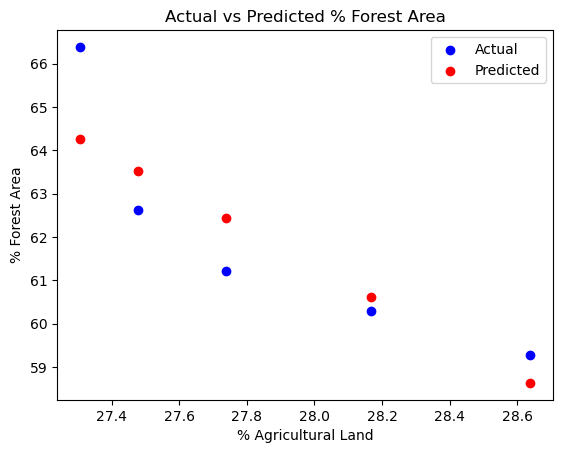

In [19]:
data = pd.DataFrame({
    'forest_area': br_data_pivoted['Forest area (% of land area)'],
    'agricultural_land': br_data_pivoted['Agricultural land (% of land area)']
})

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Define features (independent variable) and target (dependent variable)
X = data[['agricultural_land']]
y = data['forest_area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient for % Agricultural Land: {model.coef_[0]}')

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('% Agricultural Land')
plt.ylabel('% Forest Area')
plt.title('Actual vs Predicted % Forest Area')
plt.legend()
plt.show()



* #### 6. Forecast of % Forest Area if % Agricultural Area continues to increase by 0.055% per year

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


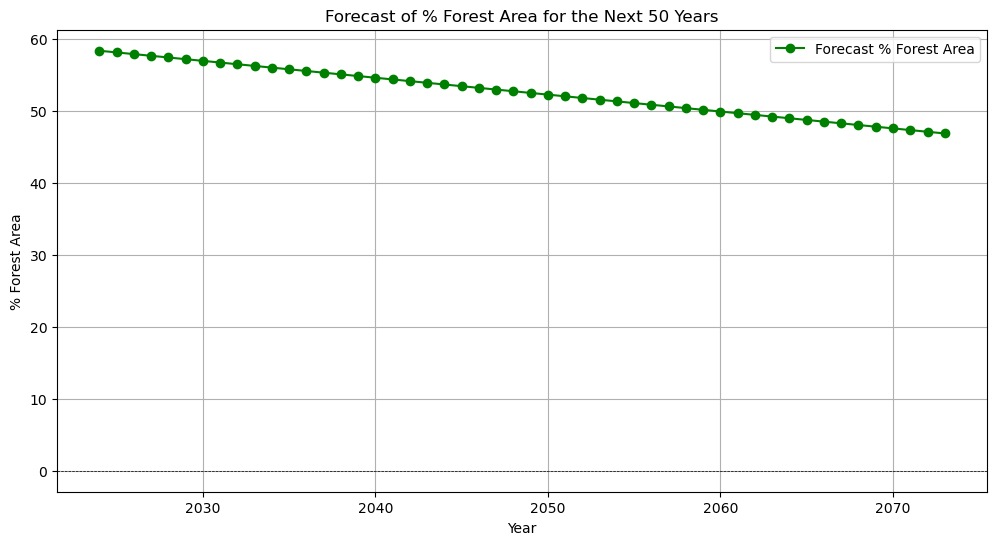

In [20]:
# Prepare your data again (just as a reference)
data = pd.DataFrame({
    'forest_area': br_data_pivoted['Forest area (% of land area)'],
    'agricultural_land': br_data_pivoted['Agricultural land (% of land area)']
})

# Create a linear regression model
X = data[['agricultural_land']]
y = data['forest_area']
model = LinearRegression()
model.fit(X, y)

# Create future data for % Agricultural Land
# Assume you have a starting value for % Agricultural Land, e.g., the last value in your dataset
last_agricultural_land = data['agricultural_land'].iloc[-1]
years = np.arange(1, 51)  # Next 50 years

# Generate future % Agricultural Land values
# Example: assuming an increase of +0.5% each year
change_per_year = 0.055
future_agricultural_land = last_agricultural_land + (years * change_per_year)

# Reshape for prediction
future_agricultural_land = future_agricultural_land.reshape(-1, 1)

# Make predictions
future_forest_area = model.predict(future_agricultural_land)

# Create a DataFrame for future predictions
forecast_years = pd.DataFrame({
    'Year': np.arange(2024, 2024 + 50),
    'Predicted % Forest Area': future_forest_area
})

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_years['Year'], forecast_years['Predicted % Forest Area'], marker='o', color='green', label='Forecast % Forest Area')
plt.xlabel('Year')
plt.ylabel('% Forest Area')
plt.title('Forecast of % Forest Area for the Next 50 Years')
plt.axhline(0, color='black', linewidth=0.5, ls='--')  # Adding a horizontal line at y=0 for reference
plt.legend()
plt.grid()
plt.show()


#### Conclusion <a class="anchor" id="conclusion"></a>

* The climate change is a burning topic and the increasing CO2 emissions have a key role in this process. Brazilian forests - Amazonia as the most important one for decarbonization purposes - are know as the breath of the Earth and help filtering the CO2 emited not just in Brazil but across the world.
    - The analyzed data from 1999 to 2023 suggests there is a gradual deforestation process in Brazil. During this period, the forest area as percentage of land area reduced by 0.28 percentage points per year, resulting in less 6.7% of forest areas by 2023 compared to 1999. 
    - Simultaneously, Brazil's CO2 emissions increased during the first half of the period, peaking in 2014 and easing since then.
    - The urbanization process is highly correlated with the deforestationization process, which might suggest that the presence of rural families helps preserve the forest.
    - The expansion of agricultural activities across Brazilian land affects negatively the forest area. On average, for every 1% increase in agricultural land, the percentage of forest area decreases by approximately 4.22% according to the model used (R2 = 76% confidence).
    - The percentage of agricultural land in Brazil increases at a rate of 0.055% per year. Considering this trend remains for the next years, forest areas will go from more than 66% of total land area in 1999 to less than 50% in 2060.